1. Use the function to get data

In [1]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import numpy as np
import getstock as gs


In [2]:
# get SPY data in minute interval by using the function in getstock.py
df = gs.getMinuteStockPrices('SPY','A00BJ6AI14GC51O')

In [3]:
df.head

<bound method NDFrame.head of                        open      high     low     close   volume
2020-05-26 09:31:00  301.93  302.0800  301.88  301.9200  3299247
2020-05-26 09:32:00  301.92  301.9200  301.64  301.7200   475532
2020-05-26 09:33:00  301.71  301.7100  301.34  301.4600   450738
2020-05-26 09:34:00  301.48  301.5434  301.41  301.4925   333632
2020-05-26 09:35:00  301.51  301.5166  301.34  301.3700   314594
...                     ...       ...     ...       ...      ...
2020-06-01 15:56:00  305.69  305.9000  305.65  305.7800   354829
2020-06-01 15:57:00  305.78  305.8000  305.66  305.7850   255493
2020-06-01 15:58:00  305.76  305.7900  305.62  305.7100   252908
2020-06-01 15:59:00  305.71  305.7600  305.66  305.6700   338887
2020-06-01 16:00:00  305.68  305.6800  305.43  305.5800   774153

[1947 rows x 5 columns]>

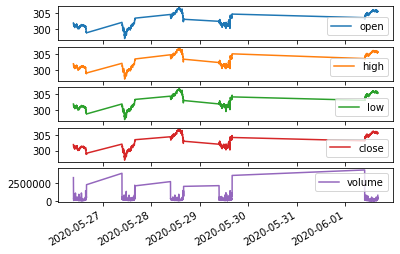

In [4]:
# plot the data for open, high, low, close and volume
_ = df[['open', 'high', 'low', 'close', 'volume']].plot(subplots=True)

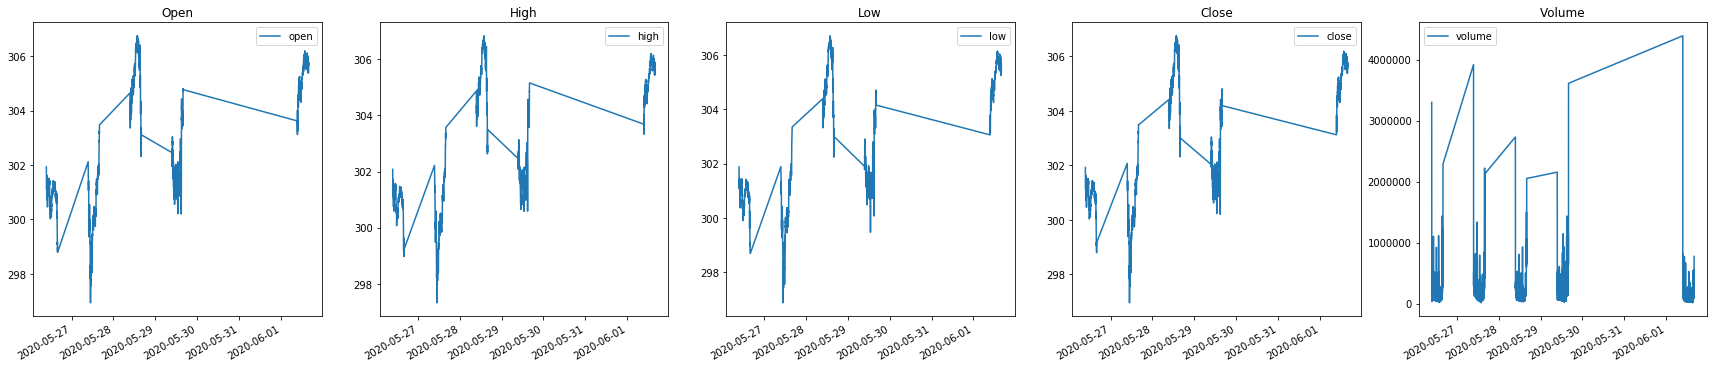

In [5]:
# plot a more clear graph
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize=(30,6))
df[['open']].plot(ax=ax1, title="Open")
df[['high']].plot(ax=ax2, title="High")
df[['low']].plot(ax=ax3, title="Low")
df[['close']].plot(ax=ax4, title="Close")
df[['volume']].plot(ax=ax5, title="Volume")

In [17]:
# b.Calculate the change in price from one day to the next using the “diff()” command on the “close” price column.
diff_df = df[['close']].diff()

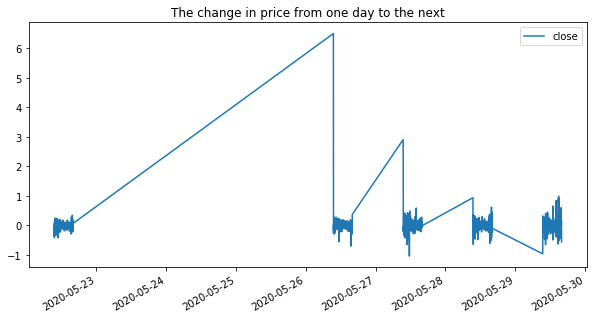

In [19]:
# plot the price changing data
diff_df.plot(title='The change in price from one day to the next',figsize=(10,5))

2.

In [67]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

copper = sm.datasets.copper.load_pandas().data # load the copper data by pandas
years = np.arange(1951, 1976) # limit the date from 1951 to 1976
copper.index = years # take 'yeats' as the index of the DataFrame

# a. calculate the mean of 'WOELDCONSUMPTION'
WC_mean = copper['WORLDCONSUMPTION'].mean()
print(f"a. The mean of 'WORLDCONSUMPTION' is {WC_mean}")

# b. calculate the median of 'COPPERPRICE'
CP_median = copper['COPPERPRICE'].median()
print(f"b. The median of 'COPPERPRICE' is {CP_median}")

# c. caLculate the min and max value of 'ALUMPRICE'
A_min = copper['ALUMPRICE'].min()
A_max = copper['ALUMPRICE'].max()
print(f"c. The min on 'ALUMPRICE' is {A_min} and the max on 'ALUMPRICE' is {A_max}")


a. The mean of 'WORLDCONSUMPTION' is 5433.6320000000005
b. The median of 'COPPERPRICE' is 36.24
c. The min on 'ALUMPRICE' is 18.56 and the max on 'ALUMPRICE' is 27.4


3.CAPM analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import getstock as gs

apikey = "A00BJ6JAI14GC510"

In [2]:
market_price = gs.getDailyStockPrices("SPY", apikey) # get the daily market price by loading daily data of S&P 500 Index

In [89]:
stock_price = gs.getDailyStockPrices('PFE', apikey) # I pick a Pfizer as my target ticker using the symbol 'PFE'

In [90]:
# extract the data and put these two datas into a DataFrame
start_date = stock_price.iloc[0].name
model_data = pd.DataFrame(columns=['market_price', 'stock_price'], index=stock_price.index)
model_data['market_price'] = market_price[start_date:]
model_data['stock_price'] = stock_price[start_date:]

In [91]:
# calculate the return of market and 'PFE' using .pct_change()
model_data['market_return'] = model_data['market_price'].pct_change()
model_data['stock_return'] = model_data['stock_price'].pct_change()

In [92]:
# import the T-bill datas for calculating the risk-free return from excel and drop row No.1
rf = pd.read_excel('tbilldata.xlsx', skiprows=1)

In [93]:
# change DATE to a datetime index in the DataFrame
rf.index = pd.to_datetime(rf['DATE'])
rf_data = rf.drop('DATE', axis=1)

In [94]:
rf_data.head()

,BANK DISCOUNT,COUPON EQUIVALENT,BANK DISCOUNT.1,COUPON EQUIVALENT.1,BANK DISCOUNT.2,COUPON EQUIVALENT.2,BANK DISCOUNT.3,COUPON EQUIVALENT.3,BANK DISCOUNT.4,COUPON EQUIVALENT.4
DATE,,,,,,,,,,
2002-01-02,1.71,1.74,NaN,NaN,1.71,1.74,1.81,1.85,NaN,NaN
2002-01-03,1.70,1.73,NaN,NaN,1.70,1.73,1.78,1.82,NaN,NaN
2002-01-04,1.69,1.72,NaN,NaN,1.69,1.72,1.78,1.82,NaN,NaN
2002-01-07,1.68,1.71,NaN,NaN,1.66,1.69,1.73,1.77,NaN,NaN
2002-01-08,1.67,1.69,NaN,NaN,1.65,1.68,1.74,1.78,NaN,NaN


In [95]:
# Transfer the annual return rate in to daily return rate
rf_data_daily = rf_data['BANK DISCOUNT']/360

In [96]:
rf_data_daily.head()

DATE
2002-01-02    0.004750
2002-01-03    0.004722
2002-01-04    0.004694
2002-01-07    0.004667
2002-01-08    0.004639
Name: BANK DISCOUNT, dtype: float64

In [97]:
# extract the data in a starting date with the market and the stock
model_data['rf_return'] = rf_data_daily[start_date:]

In [98]:
model_data

,market_price,stock_price,market_return,stock_return,rf_return
2000-05-31,142.5625,43.75,NaN,NaN,NaN
2000-06-01,143.6875,45.69,0.007891,0.044343,NaN
2000-06-02,148.9375,45.94,0.036538,0.005472,NaN
2000-06-05,147.4687,43.81,-0.009862,-0.046365,NaN
2000-06-06,146.6250,43.00,-0.005721,-0.018489,NaN
...,...,...,...,...,...
2020-05-27,302.1200,37.41,0.000629,-0.006375,NaN
2020-05-28,304.6500,37.84,0.008374,0.011494,NaN
2020-05-29,302.4519,38.27,-0.007215,0.011364,NaN
2020-06-01,303.6200,35.50,0.003862,-0.072380,NaN


In [99]:
# save the DataFrame to pickle
model_data.to_pickle('model_data.pickle')

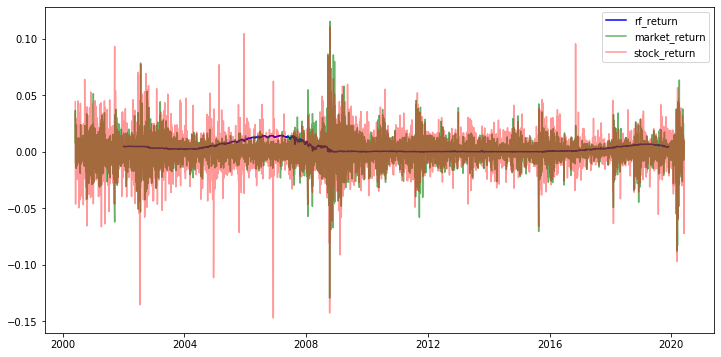

In [100]:
fig, ax = plt.subplots(1, figsize=(12,6))
ax.plot(model_data.rf_return, color="blue", label="rf_return")
ax.plot(model_data.market_return, color="green", label="market_return", alpha=0.6)
ax.plot(model_data.stock_return, color="red", label="stock_return", alpha=0.4)
plt.legend()
plt.show()